In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as op

In [49]:
from sklearn import svm  # 也可以使用libsvm库

## 1 Support Vector Machines
### 1.1 Example Dataset 1 (linearKernel)

In [18]:
# getting Dataset 1
data1 = sio.loadmat("ex6data1.mat")
X = data1['X']
y = data1['y']
Xn = X[np.where(y == 0)[0]]
Xp = X[np.where(y == 1)[0]]

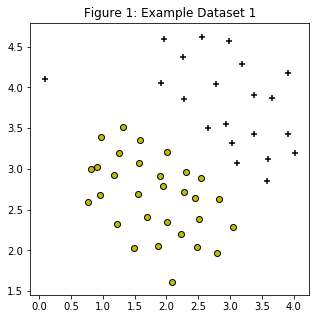

In [48]:
# Visualizing Dataset1
plt.figure(figsize = (5, 5))
plt.scatter(Xn[:, 0], Xn[:, 1], edgecolors = 'k', facecolors = 'y')
plt.scatter(Xp[:, 0], Xp[:, 1], marker = "+", color = 'k')
plt.title("Figure 1: Example Dataset 1")
plt.show()

#### [sklearn库中svm基本使用](https://blog.csdn.net/qq_33810188/article/details/80293839)
#### [sklearn库中svm函数特性](http://www.stardustsky.net/index.php/post/53.html)
#### [sklearn库中svm函数参数](https://www.cnblogs.com/solong1989/p/9620170.html)

In [110]:
# Fitting the model
def svmtrain(X, y, kernel, C):
    clf = svm.SVC(kernel = kernel, C = C)
    clf.fit(X, y.ravel())    # y必须是1维的
    return clf

In [119]:
# getting the separating hyperplane / visualizeBoundaryLinear
def plotHyperplane(X, y, kernel, C):
    clf = svmtrain(X, y, kernel, C)
    #print( clf.intercept_ )     # 即参数 theta[0](截距)
    #print( clf.coef_ )          # 即参数 theta[1:]( coefficient 支持向量系数)
    theta = np.append(clf.intercept_, clf.coef_.ravel())
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(theta[1]*x1 + theta[0])/theta[2]
    #plt.figure(figsize = (5, 5))
    plt.plot(x1, x2)
    plt.scatter(Xn[:, 0], Xn[:, 1], edgecolors = 'k', facecolors = 'y')
    plt.scatter(Xp[:, 0], Xp[:, 1], marker = "+", color = 'k')
    plt.title("Figure 2: SVM Decision Boundary with C = {} (Example Dataset 1)".format(C))
    plt.show()

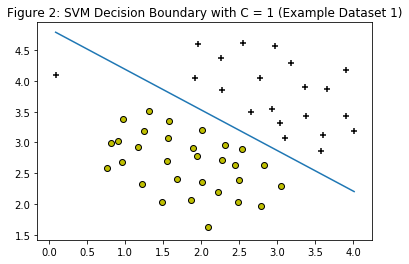

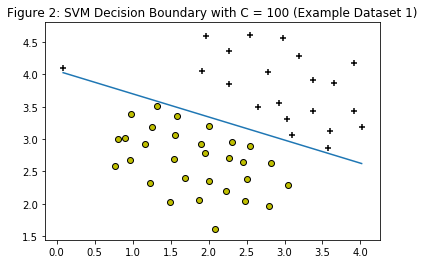

In [120]:
# Plot linear boundary 
plotHyperplane(X, y, 'linear', 1)
plotHyperplane(X, y, 'linear', 100)